<a href="https://colab.research.google.com/github/yukaberry/detect_ai_content/blob/feature%2Ffeatures_text/notebooks/texts%20/features_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Step 1: Download the ZIP file using wget
!wget -O model_training_dataset.zip https://storage.googleapis.com/detect-human-ai-generated-raw-data/text_samples/text_samples.zip

# Step 2: Unzip the file
!unzip model_training_dataset.zip


--2024-11-05 20:31:34--  https://storage.googleapis.com/detect-human-ai-generated-raw-data/text_samples/text_samples.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.207, 74.125.142.207, 74.125.195.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38278427 (37M) [application/zip]
Saving to: ‘model_training_dataset.zip’

model_training_data 100%[===================>]  36.50M  16.1MB/s    in 2.3s    

2024-11-05 20:31:37 (16.1 MB/s) - ‘model_training_dataset.zip’ saved [38278427/38278427]

Archive:  model_training_dataset.zip
   creating: samples/
  inflating: samples/sample_dataset_10000.csv  
  inflating: samples/sample_dataset_1000.csv  
  inflating: samples/sample_dataset_50000.csv  


In [4]:
import pandas as pd

# Corrected file path to include the 'samples/' directory
hybrid_df = pd.read_csv("samples/sample_dataset_1000.csv")
hybrid_df.head()

,Unnamed: 0,text,source,generated
0,667776,"\nEgypt is a land of wonders and fascinations,...",huggingface.co_human_ai_generated_text,1.0
1,969602,These volunteer experiences have taught me inv...,huggingface.co_human_ai_generated_text,1.0
2,38824,Online learning and traditional classroom edu...,NaN,1.0
3,27204,Being a student in college can often be an ove...,NaN,1.0
4,751218,A positive outlook can have contagious effects...,huggingface.co_human_ai_generated_text,1.0


In [38]:
#import gc
#del sample_df  # replace sample_df with any unused variables you want to clear
#gc.collect()

9687

In [5]:
hybrid_df.shape

(1000, 4)

In [40]:
'''

# Function to process the dataset in chunks
def get_huggingface_texts(number):
    path = "model_training_dataset.csv"
    chunksize = number  # Set chunk size, e.g., 10000 for smaller chunks

    # Initialize empty lists to store chunked data
    human_text_data = []
    ai_text_data = []

    for chunk in pd.read_csv(path, chunksize=chunksize):
        # Process each chunk separately

        # Human text chunk
        human_chunk = chunk[['id', 'human_text', 'instructions']].copy()
        human_chunk.rename(columns={'human_text': 'text'}, inplace=True)
        human_chunk['generated'] = 0  # Label as human-generated
        human_text_data.append(human_chunk)

        # AI text chunk
        ai_chunk = chunk[['id', 'ai_text', 'instructions']].copy()
        ai_chunk.rename(columns={'ai_text': 'text'}, inplace=True)
        ai_chunk['generated'] = 1  # Label as AI-generated
        ai_text_data.append(ai_chunk)

    # Concatenate all chunks after processing
    huggingface_combined_text_df = pd.concat(human_text_data + ai_text_data, ignore_index=True)

    return huggingface_combined_text_df

# Load and process the data in chunks, with each chunk size of 10,000 rows
huggingface_combined_text_df = get_huggingface_texts(10000)
huggingface_combined_text_df.head()

'''

'\n\n# Function to process the dataset in chunks\ndef get_huggingface_texts(number):\n    path = "model_training_dataset.csv"\n    chunksize = number  # Set chunk size, e.g., 10000 for smaller chunks\n\n    # Initialize empty lists to store chunked data\n    human_text_data = []\n    ai_text_data = []\n\n    for chunk in pd.read_csv(path, chunksize=chunksize):\n        # Process each chunk separately\n\n        # Human text chunk\n        human_chunk = chunk[[\'id\', \'human_text\', \'instructions\']].copy()\n        human_chunk.rename(columns={\'human_text\': \'text\'}, inplace=True)\n        human_chunk[\'generated\'] = 0  # Label as human-generated\n        human_text_data.append(human_chunk)\n\n        # AI text chunk\n        ai_chunk = chunk[[\'id\', \'ai_text\', \'instructions\']].copy()\n        ai_chunk.rename(columns={\'ai_text\': \'text\'}, inplace=True)\n        ai_chunk[\'generated\'] = 1  # Label as AI-generated\n        ai_text_data.append(ai_chunk)\n\n    # Concatenate 

In [6]:
# Shuffle the combined dataset after concatenation
s_hybrid_df = hybrid_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [7]:
s_hybrid_df.head()


,Unnamed: 0,text,source,generated
0,373008,Another potential disadvantage is difficulty u...,huggingface.co_human_ai_generated_text,1.0
1,344262,It can actually help create an atmosphere of e...,huggingface.co_human_ai_generated_text,1.0
2,81011,It is important to remember that focusing on w...,huggingface.co_human_ai_generated_text,1.0
3,833496,Whether it's assisting with someone's homework...,huggingface.co_human_ai_generated_text,1.0
4,607382,It has the power to not only reduce the diffic...,huggingface.co_human_ai_generated_text,1.0


In [8]:
!pip install readability-lxml

In [9]:
!pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 34.5 MB/s eta 0:00:00


In [10]:
# Core Libraries
import numpy as np
import pandas as pd

# Text and NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import spacy
import textstat
from textblob import TextBlob
from transformers import pipeline

# Advanced Libraries for Word Embeddings and Semantic Analysis
from sentence_transformers import SentenceTransformer, util

# For Topic Modeling
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# NLTK data downloads
nltk.download('stopwords')
nltk.download('punkt')

# Load Spacy model for NLP
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Text-Based Features
Text-based features provide basic insights into the structure and composition of each text, such as word count, sentence count, and stopword usage.

Libraries in use : Natural Language Toolkit (NLTK)

	1. Word Count: Calculates the total number of words in each text by tokenizing the text with word_tokenize().
    This gives an insight into the length and verbosity of the text.
	2. Sentence Count: Uses sent_tokenize() to count the number of sentences in each text.
    This helps understand the sentence structure and complexity.
	3. Average Word Length: Computes the average length of words in each text.
    This provides information on the complexity of vocabulary used.
	4. Stopwords Count: Counts the number of stopwords in each text using the NLTK English stopwords list.
    Stopwords are commonly used words (like “the”, “and”) that may not carry significant meaning on their own.


    

In [12]:
def text_based_features(text_df, text_column='text'):
    features = pd.DataFrame()

    # Word count,
    features['word_count'] = text_df[text_column].apply(lambda x: len(word_tokenize(x))) # using functional programming

    # Sentence count
    features['sentence_count'] = text_df[text_column].apply(lambda x: len(sent_tokenize(x)))

    # Average word length
    features['avg_word_length'] = text_df[text_column].apply(lambda x: np.mean([len(word) for word in word_tokenize(x)]))

    # Stopwords count
    features['stopwords_count'] = text_df[text_column].apply(lambda x: sum([1 for word in word_tokenize(x) if word.lower() in stopwords.words('english')]))#  list comprehension

    return features

# Lexical Diversity and Readability Scores

Libraries in use : NLTK--> tokenization, Textstast--> calculate scores: built -in fucntions

Lexical diversity measures the variety of words in text, indicating richness in vocabulary, while readability scores assess how easy a text is to read. Readability metrics such as the Flesch Reading Ease and Dale-Chall Score are used.
Key Concepts

- Lexical Diversity: Measures the variety of words in a text.
    A higher lexical diversity means a richer vocabulary, while a lower one suggests repetitive or simpler language.
- Readability Scores: These scores quantify how easy or difficult it is to read a given text.
    Higher scores generally indicate simpler texts, while lower scores imply more complex language.

	• Flesch Reading Ease: A higher score --> simpler text, easy to read

	• SMOG Index: Measures the years of education needed to understand a piece of writing. B)

	• Flesch-Kincaid Grade Level: Indicates the U.S. school grade level required to understand the text.



In [13]:
def lexical_diversity_readability(text_df, text_column='text'):
    features = pd.DataFrame()

    # Lexical diversity (Unique words / Total words)
    features['lexical_diversity'] = text_df[text_column].apply(lambda x: len(set(word_tokenize(x))) / len(word_tokenize(x)) if len(word_tokenize(x)) > 0 else 0)

    # Readability Scores
    features['flesch_reading_ease'] = text_df[text_column].apply(textstat.flesch_reading_ease)
    features['smog_index'] = text_df[text_column].apply(textstat.smog_index)
    features['flesch_kincaid_grade'] = text_df[text_column].apply(textstat.flesch_kincaid_grade)

    return features

# POS Tagging Features
Part of Speech (POS) tagging helps identify grammatical structures in text, such as noun and verb counts. By examining POS distributions, we can highlight stylistic differences that may distinguish AI-generated text from human-generated text.

Libraries in use: SpaCy (nlp): Used for natural language processing, specifically to tokenize text and retrieve POS tags.



In [14]:
def pos_tagging_features(text_df, text_column='text'):
    pos_features = pd.DataFrame()

    def pos_counts(text):
        doc = nlp(text) # text parsing
        pos_counts = {token.pos_: 0 for token in doc} # dictionary with POS tags (like NOUN, VERB, ADJ)
        for token in doc:
            pos_counts[token.pos_] += 1
        return pos_counts

    pos_df = text_df[text_column].apply(pos_counts).apply(pd.Series).fillna(0) # Fill missing POS tag counts with 0 for consistency across texts

    pos_df.columns = [f'pos_{col}' for col in pos_df.columns]
    pos_features = pd.concat([pos_features, pos_df], axis=1)

    return pos_features

# Sentiment and Emotion Analysis

Sentiment and emotion analysis capture the emotional tone of the text, identifying positive, negative, or neutral sentiment and specific emotions.

Libraries in use :
1.	Hugging Face Transformers:
- Function: Provides a pre-trained pipeline for sentiment analysis.
- Usage in Code: pipeline('sentiment-analysis', truncation=True, max_length=512)
-Purpose: To analyze text and classify it as positive, negative, or neutral using a transformer model.

2.	TextBlob:
- Function: Offers tools for natural language processing, specifically sentiment analysis.
- Usage in Code: TextBlob(x).sentiment.polarity and TextBlob(x).sentiment.subjectivity

- Sentiment (Transformers): General sentiment (POSITIVE, NEGATIVE, NEUTRAL)
- Polarity (TextBlob): Degree of positivity or negativity, from -1 to 1. Hope has 1 polarity, terrible -1
- Subjectivity (TextBlob): Extent of personal opinion, from 0 to 1. " I think" --> 1

In [15]:
def sentiment_emotion_features(text_df, text_column='text'):
    features = pd.DataFrame()

    # Initialize sentiment analysis pipeline
    sentiment_pipeline = pipeline('sentiment-analysis', truncation=True, max_length=512)# 'pipe : sentiment-analysis part of huggingface Transformers, no model specified default 'mini' BERT

    # Apply sentiment analysis in batches
    texts = text_df[text_column].tolist()
    sentiment_results = sentiment_pipeline(texts, truncation=True, max_length=512, batch_size=32)  # Adjust batch_size as needed

    # Extract sentiment labels from the results
    features['sentiment'] = [result['label'] for result in sentiment_results]

    # Polarity and subjectivity from TextBlob
    features['polarity'] = text_df[text_column].apply(lambda x: TextBlob(x).sentiment.polarity)
    features['subjectivity'] = text_df[text_column].apply(lambda x: TextBlob(x).sentiment.subjectivity)

    return features

# N-grams and Keyword Features
N-grams and keyword features provide insights into common phrases and important keywords, which can distinguish between human and AI-generated texts.

Libraries in Use:
- Sklearn’s CountVectorizer: Used for extracting n-grams (bigrams and trigrams) from the text and counting their occurrences.

N-gram : sequence of n adjancent words in a sentence,
- Ex: “The product is great,” the bigrams are:
"The product” - "product is" -  "product is great"
- “Humans and AI can collaborate.” the triagrams

In [16]:
def ngrams_keyword_features(text_df, text_column='text'):
    features = pd.DataFrame()

    # Bi-grams count
    vectorizer = CountVectorizer(ngram_range=(2, 2))
    bigram_matrix = vectorizer.fit_transform(text_df[text_column])
    features['bigram_count'] = bigram_matrix.sum(axis=1).A1

    # Trigrams count
    vectorizer = CountVectorizer(ngram_range=(3, 3))
    trigram_matrix = vectorizer.fit_transform(text_df[text_column])
    features['trigram_count'] = trigram_matrix.sum(axis=1).A1 # .A1 converts the sparse column vector into a 1-d np array, to work with pd df columns.

    return features

# Linguistic Complexity Features

These features analyze the complexity of sentences, including the number of clauses and the depth of syntactic structures.
- Dependency structures : its like parts of the sentence that helps to make sense, like names of people, places, or things being talked about.

- " The dog runs”...low complexity, entities : none, dependency count 0
- " Jerome is a french experienced ios developer " ...high complexity, entities: 3 , count dependency = 3

Libraries in use : 	SpaCy: NLP library, to perform dependency parsing. The **ents** attribute in SpaCy identifies entities in the text, which can act as a proxy to understand the text’s syntactic structure. Uses Named Entity Recognition (NER), to define Entities : “real-world objects” in texts...


In [17]:
def linguistic_complexity_features(text_df, text_column='text'):
    features = pd.DataFrame()

    # Dependency count as a proxy for syntactic complexity
    features['dependency_count'] = text_df[text_column].apply(lambda x: len([token for token in nlp(x).ents]))

    return features

# Semantic Similarity

measures how close the meaning of a text is to a known reference.
- pre-trained SBERT model converts sentences into dense vector representations (embeddings) that capture the semantic meaning.
- example : A = “AI is transforming industries.”, B is a " reference text"
- semantic_ similarity =
Cosine similarity between two vectors \( A \) and \( B \) is defined as:

$$
\text{cosine\_similarity} = \cos(\theta) = \frac{{A \cdot B}}{{\|A\| \|B\|}} = \frac{{\sum_{i=1}^{n} A_i B_i}}{{\sqrt{\sum_{i=1}^{n} A_i^2} \cdot \sqrt{\sum_{i=1}^{n} B_i^2}}}
$$



Note: I need to create a reference text, it must be a commun theme of type of language across the dataset as a benchmark. Challenge: if we make an hybrid dataset, themes are mixed which make difficult to find a reference text...
- strategy 1: maybe using a K-means on the text embeddings to group similar texts,...
- strategy 2 : pick randomly one text and run the function against...




In [19]:
# Strategy 2 : k-means on embedding to find clusters

from sklearn.cluster import KMeans
import torch


model = SentenceTransformer('all-MiniLM-L6-v2') # pre-trained SBERT model is loaded

embeddings = model.encode(s_hybrid_df['text'].tolist(), convert_to_tensor=True) # calculate embeddings

num_clusters = 2 # ai or human..
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings.cpu().numpy())  # Run clustering

#Identify Reference Texts
# Find the text closest to the centroid of each cluster
reference_texts = []
for i in range(num_clusters):
    cluster_indices = [index for index, label in enumerate(cluster_labels) if label == i]
    cluster_embeddings = embeddings[cluster_indices]
    centroid_embedding = torch.tensor(kmeans.cluster_centers_[i], dtype=torch.float)

    # Calculate cosine similarity between each text in the cluster and the centroid
    cosine_similarities = util.cos_sim(cluster_embeddings, centroid_embedding)
    closest_idx = cosine_similarities.argmax().item()
    reference_texts.append(s_hybrid_df.iloc[cluster_indices[closest_idx]]['text'])



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [25]:
reference_texts[1]

'on my opinion the best thing to do is to keep the regular five days at school, and to keep working at least six hours a day.\n\nTeachers and staff members are thinking that students are going home and they will do their homework or study, but what they dont think is that some people need help with school work, or they feel more comfortable studying at school, now with that less day they will be more students failing projects and exams, for example if a students used to study at the library after school he is not going to be able because it is going to be late by the time he gets out of school, they should keep the normal schedule for all the students that are getting benefits from it\n\nPeople wants to save energy and money by taking away a day of school, but they dont think that students will be going home to use their cellphones, watch TV, play video games, and a lot of more things that consume energy, if they stay at school they are not going to be able to use their cellphones or a

In [20]:


# Run the semantic similarity function

def semantic_similarity_features(text_df, text_column='text'):
    # Initialize an empty DataFrame to store the features
    features = pd.DataFrame()

    # Calculate similarity for each text to the reference text of its cluster
    similarities = []
    for idx, text in enumerate(text_df[text_column]):
        cluster_label = cluster_labels[idx]  # Get the cluster label for the text
        reference_text = reference_texts[cluster_label]  # Get the reference text for that cluster
        reference_embedding = model.encode(reference_text)
        text_embedding = model.encode(text)

        # Calculate cosine similarity between text embedding and reference embedding
        similarity = util.cos_sim(text_embedding, reference_embedding).item()
        similarities.append(similarity)

    features['semantic_similarity'] = similarities
    return features

# Structural and Formatting Features
Capture line breaks, indentation, or special formatting often present in human-written text.

Human texts often have structured paragraphing and a varied use of punctuation for emphasis and clarity...

In [21]:
def structural_formatting_features(text_df, text_column='text'):
    features = pd.DataFrame()

    # Line break count
    features['line_break_count'] = text_df[text_column].apply(lambda x: x.count('\n'))

    # Punctuation count
    features['punctuation_count'] = text_df[text_column].apply(lambda x: sum([1 for char in x if char in '.,;!?']))

    return features

# Instruction-Based Features ( given prompt : case of hface df)
 capture specific language or prompts that may be present in instructional texts, like “Task” or “Instructions” keywords.

In [29]:
def instruction_based_features(text_df, text_column='instructions'):
    features = pd.DataFrame()

    # Instruction word count
    features['instruction_word_count'] = text_df[text_column].apply(lambda x: len(word_tokenize(x)) if pd.notna(x) else 0)

    return features

# Word Embedding Features

Embedding features represent text as vectors in a high-dimensional space, capturing nuanced meanings.
The embedding function converts each text sample into a 384-dimensional vector using SBERT embeddings.
- Each dimension of this vector captures some aspect of the text’s meaning, position in semantic space, or relationship with other words or phrases.
- every column in the output represents a unique embedding feature (e.g., embedding_0, embedding_1, …, embedding_383), and together they provide a rich, high-dimensional representation of the text.
- (384) is predefined by the model architecture

In [22]:
def embedding_features(text_df, text_column='text'):
    features = pd.DataFrame()

    # Generate embeddings using SBERT
    embeddings = text_df[text_column].apply(lambda x: model.encode(x))
    embedding_df = pd.DataFrame(embeddings.tolist())
    embedding_df.columns = [f'embedding_{i}' for i in range(embedding_df.shape[1])]
    features = pd.concat([features, embedding_df], axis=1)

    return features

# Topic Modeling Features

The topic_modeling_features function target to identify latent themes in the text by using topic modeling. This method provides insights into the primary subjects discussed in the text and assigns each text sample a probability distribution across a set number of topics.

Libraries in use:
- Scikit-Learn: For CountVectorizer to create a document-term matrix.
- Scikit-Learn LatentDirichletAllocation (LDA): For topic modeling, to capture underlying topics in the text.


CountVectorizer:
- Transforms text into a document-term matrix.
- max_df=0.95: Ignores terms that appear in more than 95% of the documents (common words that may not contribute to topic distinction).
- min_df=2: Ignores terms that appear in fewer than 2 documents (rare words).

Latent Dirichlet Allocation (LDA):
- Creates an instance of the LDA model with n_topics as the number of topics.
- n_topics=5 means the function will attempt to identify 5 distinct topics
- Fits the LDA model on the document-term matrix, learning the probability distribution of terms across topics.


Note: Maybe when using a bigger dataset, i should find topics for each ...not clear yet...


In [26]:
def topic_modeling_features(text_df, text_column='text', n_topics=5):
    features = pd.DataFrame()
    vectorizer = CountVectorizer(max_df=0.95, min_df=2) #
    doc_term_matrix = vectorizer.fit_transform(text_df[text_column])

    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(doc_term_matrix)
    topic_values = lda.transform(doc_term_matrix)
    topic_df = pd.DataFrame(topic_values, columns=[f'topic_{i}' for i in range(n_topics)])
    features = pd.concat([features, topic_df], axis=1)

    return features

In [27]:

# 1. Text-Based Features
text_features = text_based_features(s_hybrid_df, text_column='text')

In [28]:
# 2. Lexical Diversity and Readability Scores
lexical_features = lexical_diversity_readability(s_hybrid_df, text_column='text')

In [29]:
# 3. POS Tagging Features
pos_features = pos_tagging_features(s_hybrid_df, text_column='text')

In [30]:
# 4. Sentiment and Emotion Analysis
sentiment_features = sentiment_emotion_features(s_hybrid_df, text_column='text')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [31]:
# 5. N-grams and Keyword Features
ngram_features = ngrams_keyword_features(s_hybrid_df, text_column='text')

In [32]:
# 6. Linguistic Complexity Features
complexity_features = linguistic_complexity_features(s_hybrid_df, text_column='text')

In [33]:
# 7. Semantic Similarity
semantic_features = semantic_similarity_features(s_hybrid_df, text_column='text')

In [34]:
# 8. Structural and Formatting Features
structural_features = structural_formatting_features(s_hybrid_df, text_column='text')

In [ ]:
# 9. Instruction-Based Features
#instruction_features = instruction_based_features(huggingface_combined_text_df, text_column='instructions')

In [35]:
# 10. Word Embedding Features
embedding_features_df = embedding_features(s_hybrid_df, text_column='text')

In [36]:
# 11. Topic Modeling Features
topic_features = topic_modeling_features(s_hybrid_df, text_column='text', n_topics=5)

In [37]:
# Concatenate all features into a single DataFrame( missing feauture : instruction_features)
all_features = pd.concat([
    text_features, lexical_features, pos_features, sentiment_features,
    ngram_features, complexity_features, semantic_features,
    structural_features,  embedding_features_df,
    topic_features
], axis=1)

# Display combined features
all_features.head()


,word_count,sentence_count,avg_word_length,stopwords_count,lexical_diversity,flesch_reading_ease,smog_index,flesch_kincaid_grade,pos_DET,pos_ADJ,...,embedding_379,embedding_380,embedding_381,embedding_382,embedding_383,topic_0,topic_1,topic_2,topic_3,topic_4
0,191,9,5.162304,71,0.565445,43.32,14.4,12.0,14.0,19.0,...,0.087723,-0.060280,0.021752,-0.109541,0.031468,0.905390,0.001489,0.001475,0.062669,0.028977
1,266,11,4.864662,112,0.563910,42.41,14.8,12.4,18.0,19.0,...,-0.016650,0.082083,0.015836,-0.127257,0.024186,0.683897,0.113634,0.001077,0.200316,0.001076
2,202,8,4.544554,88,0.544554,48.54,13.4,12.1,12.0,12.0,...,0.017251,0.108373,0.020174,-0.051648,0.013892,0.001422,0.001425,0.001438,0.994300,0.001414
3,228,12,4.206140,96,0.552632,61.77,11.7,9.1,16.0,15.0,...,0.031003,0.016137,0.067800,-0.097144,-0.028914,0.128263,0.383207,0.239736,0.247494,0.001301
4,285,12,4.284211,143,0.547368,60.85,12.8,9.4,29.0,20.0,...,0.064268,0.086684,-0.049943,-0.078347,-0.044467,0.001081,0.001087,0.205162,0.791585,0.001085


In [47]:

# Ensure both dataframes have aligned indices to avoid mismatches
s_hybrid_df = s_hybrid_df.reset_index(drop=True)
all_features = all_features.reset_index(drop=True)

# Concatenate the original dataset with the generated features
hybrid_enhanced_df = pd.concat([s_hybrid_df, all_features], axis=1)

# Display the combined dataframe to verify

hybrid_enhanced_df.tail()

,Unnamed: 0,text,source,generated,word_count,sentence_count,avg_word_length,stopwords_count,lexical_diversity,flesch_reading_ease,...,embedding_379,embedding_380,embedding_381,embedding_382,embedding_383,topic_0,topic_1,topic_2,topic_3,topic_4
995,950016,"With the current state of the world, we can co...",huggingface.co_human_ai_generated_text,1.0,234,11,4.132479,99,0.602564,60.65,...,-0.016019,-0.008387,0.038444,-0.068498,-0.093227,0.001160,0.538300,0.244726,0.214656,0.001158
996,351665,In my positon students should be required to t...,huggingface.co_human_ai_generated_text,0.0,497,14,4.331992,241,0.356137,54.39,...,0.025836,-0.010990,0.049232,-0.032500,-0.008418,0.845605,0.000529,0.152805,0.000533,0.000529
997,49216,Cell phones have become a important item in to...,NaN,0.0,271,19,4.040590,122,0.586716,75.30,...,-0.009977,-0.074121,0.075360,-0.031040,-0.001440,0.302359,0.403430,0.160586,0.001022,0.132603
998,324998,That's why it is important for students to ide...,huggingface.co_human_ai_generated_text,0.0,447,12,3.847875,237,0.302013,58.29,...,0.012922,0.089351,0.064111,-0.060496,0.053048,0.631128,0.000600,0.367072,0.000599,0.000601
999,739474,A person with more activity can be more succes...,huggingface.co_human_ai_generated_text,0.0,778,41,3.922879,413,0.200514,79.90,...,0.025050,0.073851,0.028979,-0.027188,0.038409,0.120486,0.000354,0.878454,0.000355,0.000351


In [48]:
hybrid_enhanced_df.shape

(1000, 428)

In [45]:
hybrid_enhanced_df.columns.tolist()

['Unnamed: 0',
 'text',
 'source',
 'generated',
 'word_count',
 'sentence_count',
 'avg_word_length',
 'stopwords_count',
 'lexical_diversity',
 'flesch_reading_ease',
 'smog_index',
 'flesch_kincaid_grade',
 'pos_DET',
 'pos_ADJ',
 'pos_NOUN',
 'pos_AUX',
 'pos_VERB',
 'pos_PUNCT',
 'pos_ADV',
 'pos_ADP',
 'pos_CCONJ',
 'pos_PRON',
 'pos_SPACE',
 'pos_PART',
 'pos_NUM',
 'pos_SCONJ',
 'pos_PROPN',
 'pos_INTJ',
 'pos_SYM',
 'pos_X',
 'sentiment',
 'polarity',
 'subjectivity',
 'bigram_count',
 'trigram_count',
 'dependency_count',
 'semantic_similarity',
 'line_break_count',
 'punctuation_count',
 'embedding_0',
 'embedding_1',
 'embedding_2',
 'embedding_3',
 'embedding_4',
 'embedding_5',
 'embedding_6',
 'embedding_7',
 'embedding_8',
 'embedding_9',
 'embedding_10',
 'embedding_11',
 'embedding_12',
 'embedding_13',
 'embedding_14',
 'embedding_15',
 'embedding_16',
 'embedding_17',
 'embedding_18',
 'embedding_19',
 'embedding_20',
 'embedding_21',
 'embedding_22',
 'embedding_23

# EDA

## Basic Data Overview

In [53]:
# Check for missing values
missing_values = hybrid_enhanced_df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

# Summary statistics
display(hybrid_enhanced_df.describe().transpose())

Missing Values:
 source    208
dtype: int64


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,440558.291000,288882.959568,174.000000,191577.250000,411549.500000,675062.500000,998610.000000
generated,1000.0,0.514000,0.500054,0.000000,0.000000,1.000000,1.000000,1.000000
word_count,1000.0,366.662000,208.303673,3.000000,221.750000,310.000000,458.250000,1396.000000
sentence_count,1000.0,15.171000,9.408309,1.000000,8.000000,12.000000,20.000000,67.000000
avg_word_length,1000.0,4.320267,0.458339,3.277108,3.948570,4.285462,4.673489,6.000000
...,...,...,...,...,...,...,...,...
topic_0,1000.0,0.255329,0.318883,0.000216,0.001014,0.064256,0.517058,0.997420
topic_1,1000.0,0.143195,0.239736,0.000217,0.000726,0.001522,0.198231,0.998354
topic_2,1000.0,0.339246,0.348075,0.000293,0.001629,0.223261,0.632108,0.998605
topic_3,1000.0,0.215406,0.305123,0.000215,0.000801,0.047769,0.334515,0.996892


## Feature Distribution

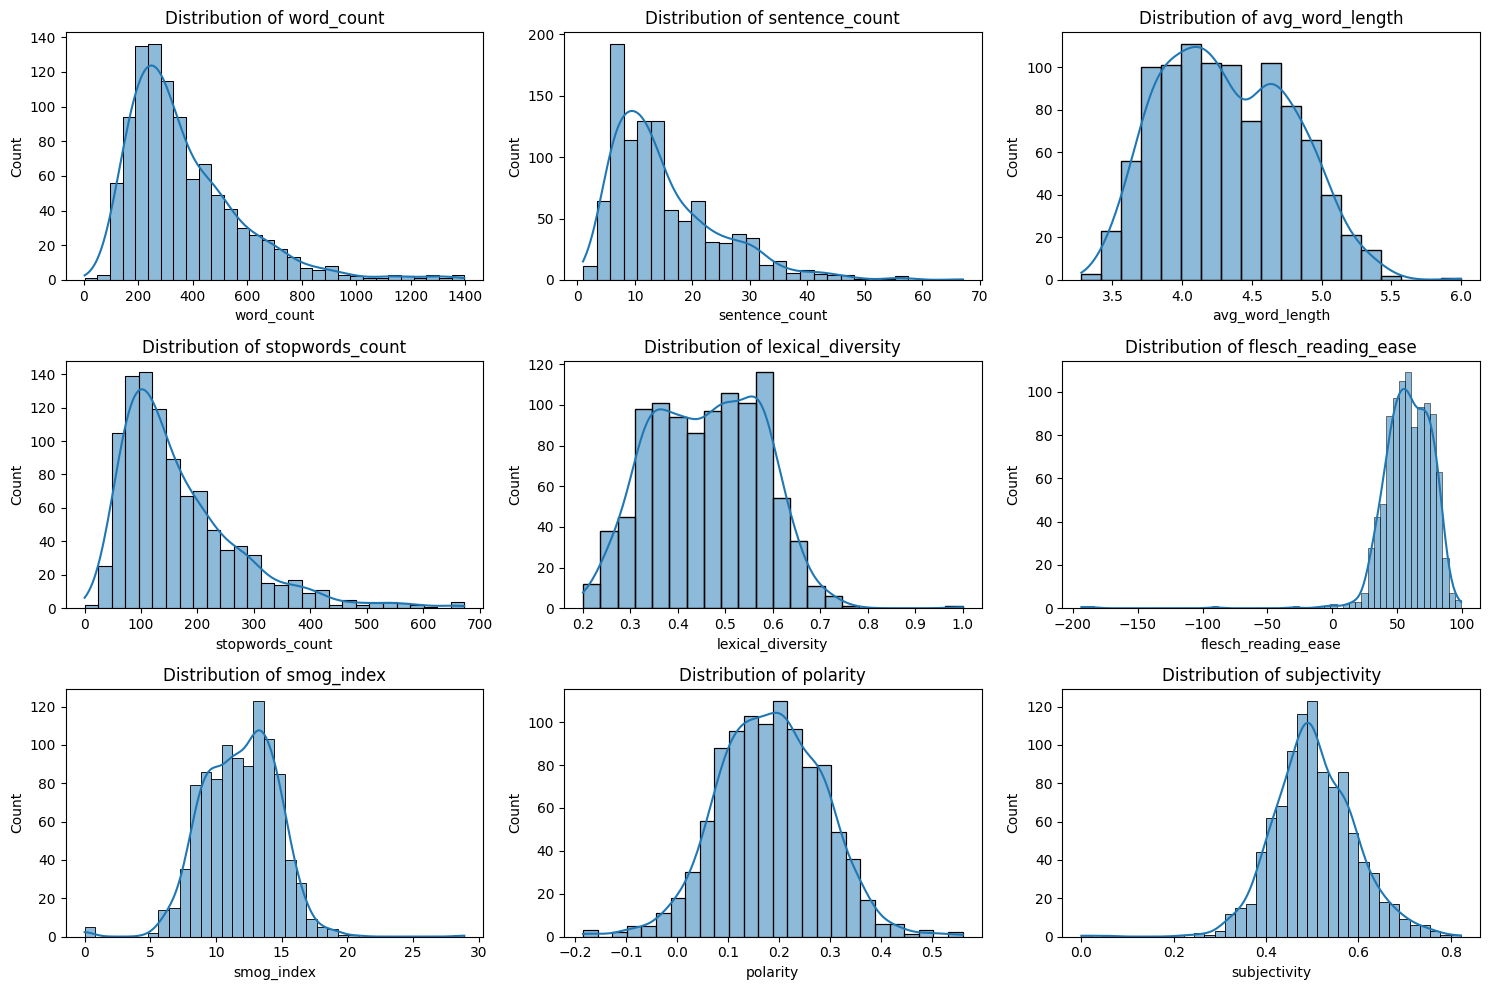

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select features to visualize
features_to_plot = ['word_count', 'sentence_count', 'avg_word_length',
                    'stopwords_count', 'lexical_diversity', 'flesch_reading_ease',
                    'smog_index', 'polarity', 'subjectivity']

# Plot histograms
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(hybrid_enhanced_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

## Correlation Analysis


In [65]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

#Filter out the embedding columns
embedding_df = hybrid_enhanced_df.filter(regex="^embedding")
non_embedding_df = hybrid_enhanced_df.drop(columns=embedding_df.columns)

In [66]:

# Perform PCA on embeddings to reduce dimensionality
pca = PCA(n_components=10)  # Adjust the number of components if needed
embedding_pca = pca.fit_transform(embedding_df)
embedding_pca_df = pd.DataFrame(embedding_pca, columns=[f'pca_{i}' for i in range(1, 11)])

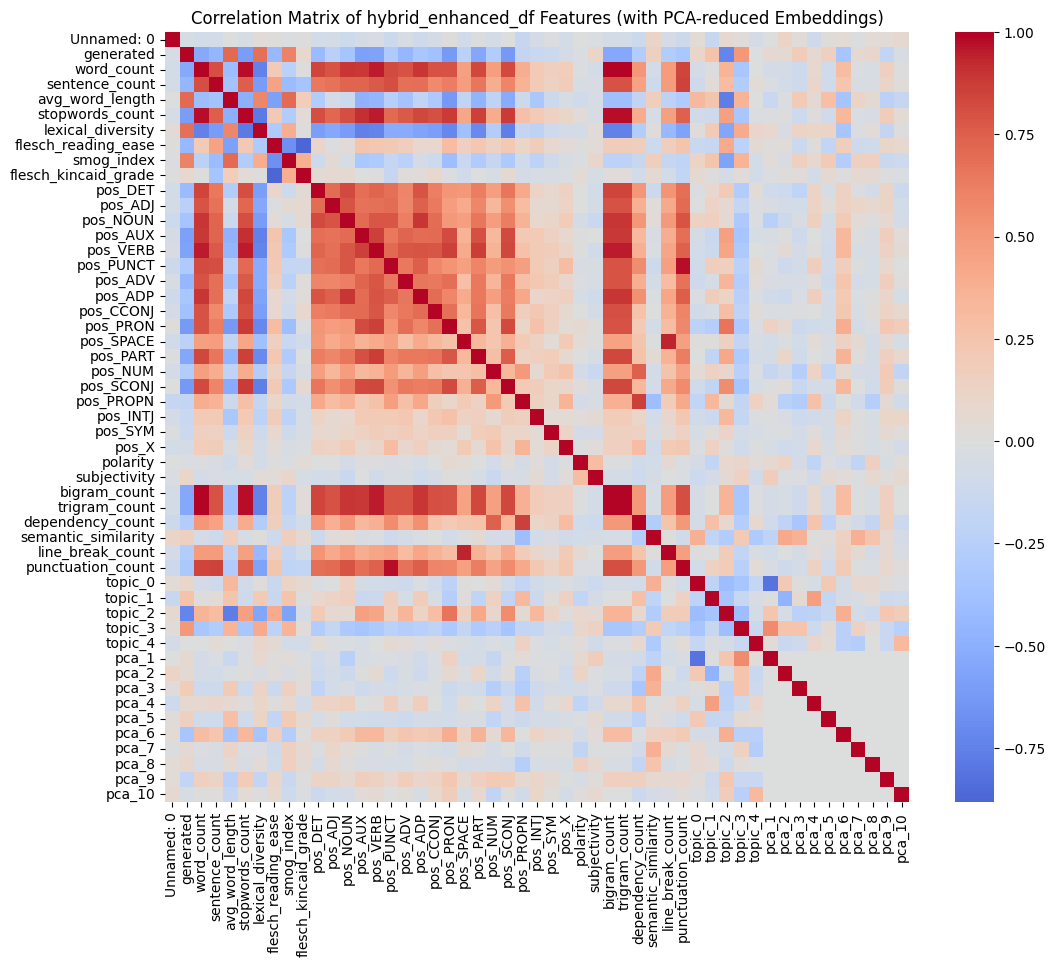

Correlations with 'generated':
 generated               1.000000
avg_word_length         0.712569
lexical_diversity       0.677459
smog_index              0.609628
topic_3                 0.505821
topic_1                 0.259356
pca_3                   0.184484
pca_5                   0.155401
semantic_similarity     0.150683
topic_0                 0.109082
subjectivity            0.107094
pca_8                   0.093068
flesch_kincaid_grade    0.076767
pca_1                   0.066103
pca_4                   0.064506
pca_7                   0.055999
pca_2                   0.044500
topic_4                -0.001152
polarity               -0.024602
pca_10                 -0.039264
Unnamed: 0             -0.048126
pos_X                  -0.067950
pos_SYM                -0.131567
pos_INTJ               -0.140972
pos_PROPN              -0.172729
pca_9                  -0.183044
pos_SPACE              -0.230684
pos_ADJ                -0.237687
line_break_count       -0.275982
dependency_

In [67]:

# Concatenate PCA components with the remaining numeric features only
numeric_non_embedding_df = non_embedding_df.select_dtypes(include=[float, int])  # Ensure only numeric features
reduced_df = pd.concat([numeric_non_embedding_df, embedding_pca_df], axis=1)

# Calculate the correlation matrix for the reduced dataset
correlation_matrix = reduced_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Matrix of hybrid_enhanced_df Features (with PCA-reduced Embeddings)')
plt.show()

# Display correlations with the 'generated' column
correlation_with_generated = correlation_matrix['generated'].sort_values(ascending=False)
print("Correlations with 'generated':\n", correlation_with_generated)

## Analysis
PCA Components:

- The PCA-reduced components (pca_1 to pca_10) show lower correlations with most of the other features, suggesting that PCA has effectively captured independent aspects of the embeddings. This is good! it indicates that the PCA components is getting unique information not present in the rest of the features, the PCA components are not redundant with the other features.

Clusters of Correlated Features: blocks of correlated features

- POS tag counts (e.g., pos_NOUN, pos_VERB, etc.), which tend to have moderate correlations with each other. This makes sense as the presence of certain parts of speech often co-occurs in similar text structures.

- Readability and complexity features, such as word_count, avg_word_length, and lexical_diversity, which show some correlations, indicating these metrics collectively describe text complexity.

- Topic features (topic_0 to topic_4) also seem to have some internal correlations, which could mean certain topics are more prevalent or related within this dataset.

## Text-Based Feature Analysis